# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [52]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file = "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [53]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np



assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_valid = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

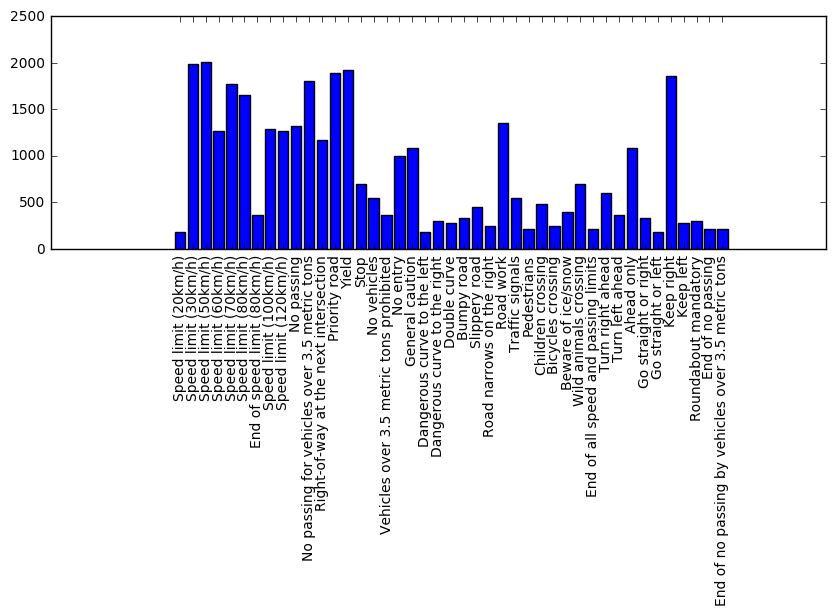

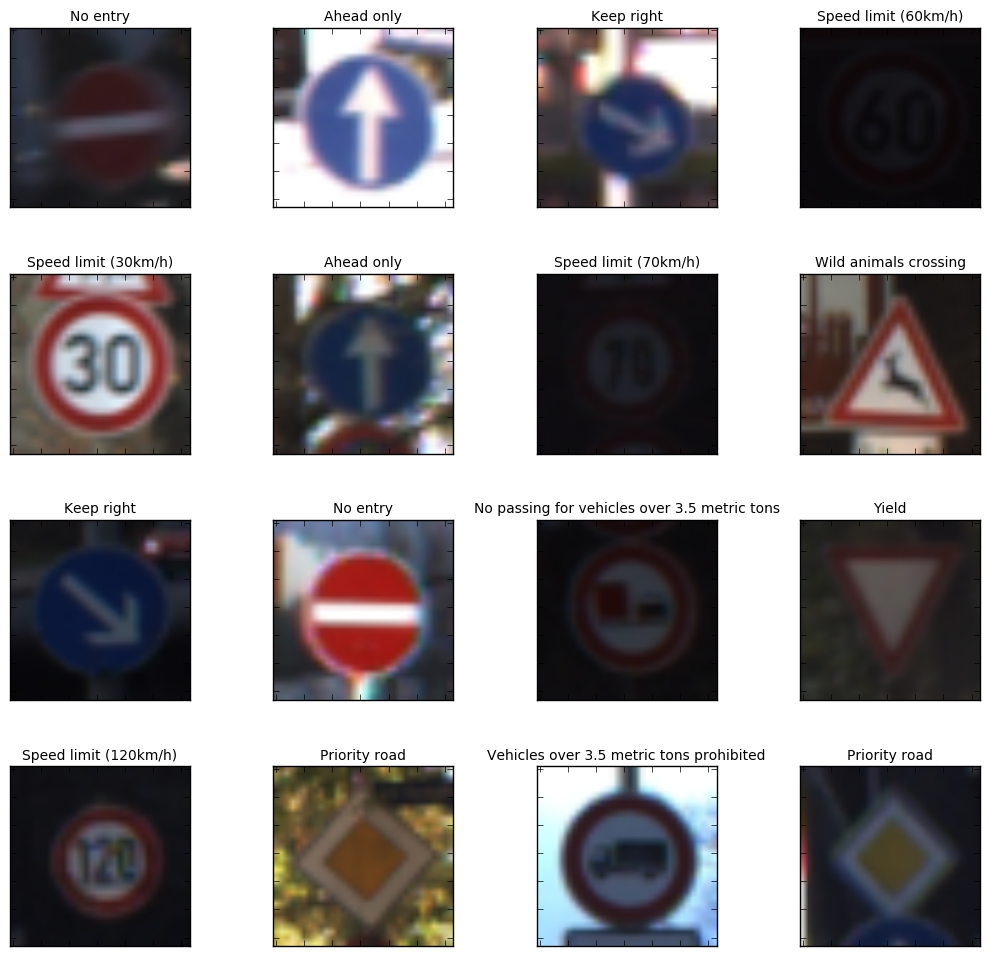

In [54]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline

enable_table = False


histogram = np.histogram(y_train, bins=np.arange(44))
    
if enable_table:
    #Histogram print
    with open('signnames.csv', newline='', encoding="utf8") as csvfile:
        spamreader = csv.reader(csvfile)
        label_names = [x[1] for x in spamreader][1:]

    print()
    print("            Histogram of training data")
    print("=========================================================")
    print("%-40s%-40s" % ("Traffic sign name", "Number of samples"))
    print("---------------------------------------------------------")
    for i in range(len(histogram[0])):   
        print("%-47s%-45d" % (label_names[histogram[1][i]], histogram[0][i]))
        print("---------------------------------------------------------")
    
#Bar plot

histogram_count = []
histogram_labels = []
for i in range(len(histogram[0])):   
    histogram_count.append(histogram[0][i])
    histogram_labels.append(label_names[histogram[1][i]])


plt.figure(figsize=(10,3))    
plt.bar(np.arange(len(histogram[0])), histogram_count, align='center')
plt.xticks(np.arange(len(histogram[0])), histogram_labels, rotation='vertical')
plot.set_xticklabels(labels, rotation='vertical')
plot.set_title("Count of each traffic sign in training set")    

print()
print()

#Image show

plt.figure(figsize=(10,10))
indexes = []
for i in range(16):
    indexes.append(random.randint(0, len(X_train)))

for i in range(16):
    index=indexes[i]
    image = X_train[index]
    
    plot = plt.subplot(4,4,i+1)
    plot.set_title(label_names[y_train[index]], fontsize=10)
    plot.imshow(image)
    
    plot.set_yticklabels([])
    plot.set_xticklabels([])
plt.tight_layout()
plt.show()
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Equalizing training data finished!
Equalizing validation data finished!
Equalizing test data finished!




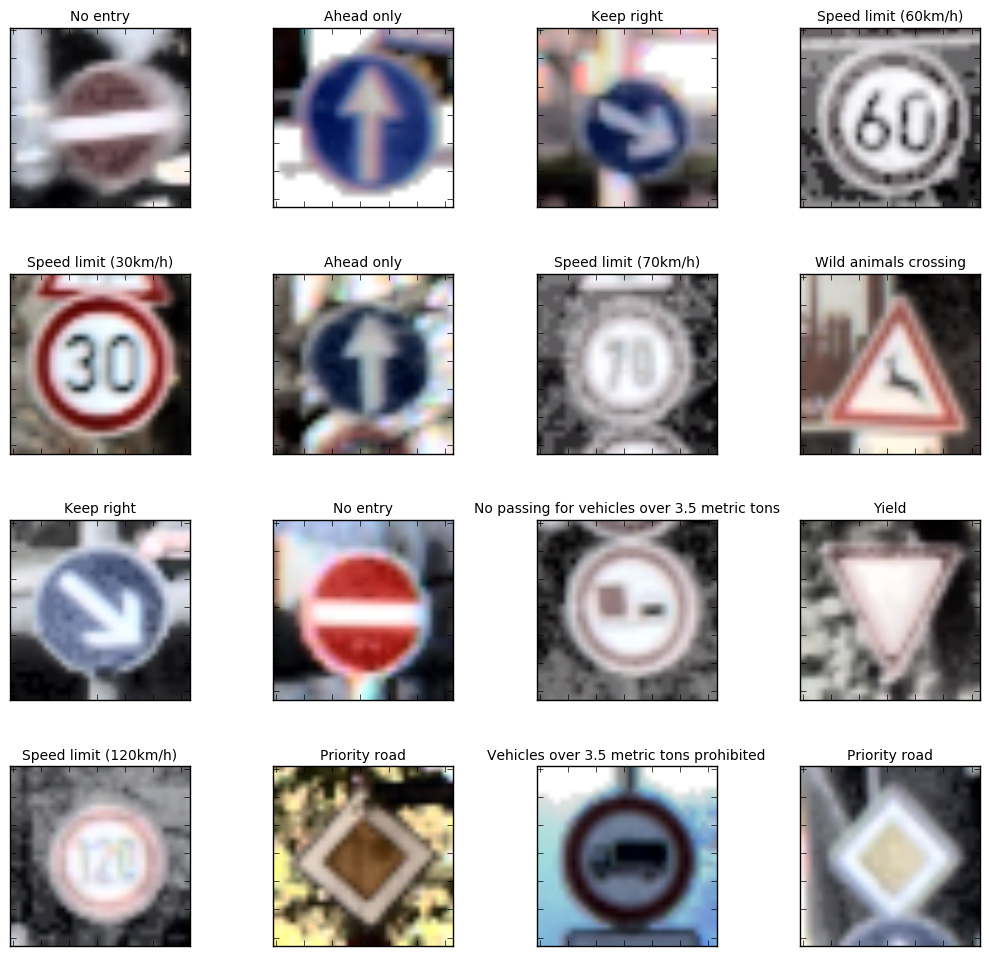

In [55]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Shuffle
from sklearn.utils import shuffle

#X_train, y_train = shuffle(X_train, y_train)

#Histogram Equalization  
import cv2
import numpy as np


enable_equilize = True;
enable_YUV = False;
enable_onlyY = False;
enable_normalize = True;

def equalize_histogram (image):

    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

    # convert the YUV image back to RGB format
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)



#equilize
if enable_equilize:
    percent = 0;
    for i in range(n_train):
        X_train[i] = equalize_histogram (X_train[i])
        if np.mod(i,100) == 0:
            percent += 10000./n_train
            b = "Equalizing ttraining data :" + "%0.2f" % percent
            print (b, end="\r")
        
        
    b = "Equalizing training data finished!"        
    print (b, end="\n")

    percent = 0;
    for i in range(n_valid):
        X_valid[i] = equalize_histogram (X_valid[i])
        if np.mod(i,100) == 0:
            percent += 10000./n_valid
            b = "Equalizing validation data :" + "%0.2f" % percent
            print (b, end="\r")
        
        
    b = "Equalizing validation data finished!"        
    print (b, end="\n")

    percent = 0;
    for i in range(n_test):
        X_test[i] = equalize_histogram (X_test[i])
        if np.mod(i,100) == 0:
            percent += 10000./n_test
            b = "Equalizing test data :" + "%0.2f" % percent
            print (b, end="\r")
    
    b = "Equalizing test data finished!"        
    print (b, end="\n")

#YUV 
if enable_YUV:
    for i in range(n_train):
        X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2YUV)
    
    for i in range(n_valid):
        X_valid[i] = cv2.cvtColor(X_valid[i], cv2.COLOR_BGR2YUV)
    
    for i in range(n_test):
        X_test[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2YUV)
        
#onlyY 
if enable_onlyY:
    for i in range(n_train):
        image_yuv = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2YUV)
        X_train[i] = image_yuv[:,:,0]
    
    for i in range(n_valid):
        image_yuv = cv2.cvtColor(X_valid[i], cv2.COLOR_BGR2YUV)
        X_valid[i] = image_yuv[:,:,0]
    
    for i in range(n_test):
        image_yuv = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2YUV)
        X_test[i] = image_yuv[:,:,0]
        
    
    
#Image show

print()
print()

plt.figure(figsize=(10,10))

for i in range(16):
    index = indexes[i]
    image = X_train[index]
    
    plot = plt.subplot(4,4,i+1)
    plot.set_title(label_names[y_train[index]], fontsize=10)
    plot.imshow(image)
    
    plot.set_yticklabels([])
    plot.set_xticklabels([])
plt.tight_layout()
plt.show()


#Normalize
if enable_normalize:        
    X_train = (X_train-128)/128
    X_valid = (X_valid-128)/128
    X_test = (X_test-128)/128
    

### Setup TensorFlow

In [5]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 64

### Model architecture

In [6]:
##### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob, keep_prob_conv):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    ## LAYER 1
    printing = False
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x6.
    F_W1 = tf.Variable(tf.truncated_normal((3, 3, 3, 6), mu, sigma))
    F_b1 = tf.Variable(tf.zeros(6))
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    layer1 = tf.nn.conv2d(x, F_W1, strides, padding) + F_b1
    if printing: print( "Layer 1 32x32x6: {}".format(layer1.get_shape()))
    # Activation.
    layer1 = tf.nn.relu(layer1)
    
    # TODO: Layer 12: Convolutional. Input = 32x32x3. Output = 32x32x12.
    F_W12 = tf.Variable(tf.truncated_normal((3, 3, 6, 12), mu, sigma))
    F_b12 = tf.Variable(tf.zeros(12))
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    layer12 = tf.nn.conv2d(layer1, F_W12, strides, padding) + F_b12
    if printing: print( "Layer 12 32x32x12: {}".format(layer12.get_shape()))
    # Activation.
    layer1 = tf.nn.relu(layer12)
    
    # Pooling. Input = 32x32x12. Output = 16x16x12.
    filter_shape = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    layer1 = tf.nn.max_pool(layer1, filter_shape, strides, padding)
    if printing: print("Layer 1 Pooling 16x16x12: {}".format(layer1.get_shape()))   
    #Dropout
    layer1 = tf.nn.dropout(layer1, keep_prob_conv)

    ##LAYER 2
    # Layer 2: Convolutional. Output = 14x14x24.
    F_W2 = tf.Variable(tf.truncated_normal((3, 3, 12, 24), mu, sigma))
    F_b2 = tf.Variable(tf.zeros(24))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    layer2 = tf.nn.conv2d(layer1, F_W2, strides, padding) + F_b2
    if printing: print("Layer 2 14x14x24: {}".format(layer2.get_shape()))
    # Activation.
    layer2 = tf.nn.relu(layer2)
    
    # Layer 22: Convolutional. Output = 12x12x48.
    F_W22 = tf.Variable(tf.truncated_normal((3, 3, 24, 48), mu, sigma))
    F_b22 = tf.Variable(tf.zeros(48))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    layer22 = tf.nn.conv2d(layer2, F_W22, strides, padding) + F_b22
    if printing: print("Layer 22 12x12x48: {}".format(layer22.get_shape()))
    
    # Activation.
    layer2 = tf.nn.relu(layer22)
   
    # Pooling. Input = 12x12x48. Output = 6x6x48.
    filter_shape = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    layer2 = tf.nn.max_pool(layer2, filter_shape, strides, padding)
    if printing: print("Layer 2 Pooling 6x6x48: {}".format(layer2.get_shape()))
    #Dropout
    layer2 = tf.nn.dropout(layer2, keep_prob_conv)
    
    

    # Flatten. Input = 6x6x48. Output = 1728.
    layer4 = tf.contrib.layers.flatten(layer2)
    if printing: print("Layer 4 flatten 1728: {}".format(layer4.get_shape()))
    
    # Layer 5: Fully Connected. Input = 400. Output = 120.
    F_W5 = tf.Variable(tf.truncated_normal((1728, 512), mu, sigma))
    F_b5 = tf.Variable(tf.zeros(512))
    layer5 = tf.add(tf.matmul(layer4, F_W5), F_b5)
    if printing: print("Layer 5  512: {}".format(layer5.get_shape()))     
    # Activation.
    layer5 = tf.nn.relu(layer5)
    #Dropout
    layer5 = tf.nn.dropout(layer5, keep_prob)
    
    
    # Layer 6: Fully Connected. Input = 512. Output = 128.
    F_W6 = tf.Variable(tf.truncated_normal((512, 128), mu, sigma))
    F_b6 = tf.Variable(tf.zeros(128))
    layer6 = tf.add(tf.matmul(layer5, F_W6), F_b6)
    if printing: print("Layer 6  128: {}".format(layer6.get_shape()))
    # Activation.
    layer6 = tf.nn.relu(layer6)
    #Dropout
    layer6 = tf.nn.dropout(layer6, keep_prob)

    
    # Layer 7: Fully Connected. Input = 128. Output = 43.
    F_W7 = tf.Variable(tf.truncated_normal((128, 43), mu, sigma))
    F_b7 = tf.Variable(tf.zeros(43))
    layer7 = tf.add(tf.matmul(layer6, F_W7), F_b7)
    if printing: print("Layer 7  43: {}".format(layer7.get_shape()))
    #Dropout
    layer7 = tf.nn.dropout(layer7, keep_prob)
    
    logits=layer7
    return logits

## Features and Labels
Train CovNet to classify German Traffic signs data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)
keep_prob_conv = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0005
valid_losses = []
train_losses = []
train_accuracies = []
valid_accuracies = []

logits = LeNet(x, keep_prob, keep_prob_conv)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1, keep_prob_conv: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [9]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
        
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, keep_prob_conv: 0.85})
            
        valid_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        
        valid_accuracies.append(valid_accuracy)
        train_accuracies.append(train_accuracy)
        
        
        print("EPOCH {:2d}:   Validation Accuracy = {:.3f}   Training Accuracy = {:.3f}" .format(i+1,valid_accuracy,train_accuracy))
        
            
    print(valid_accuracies)
    print(train_accuracies)
    
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH  1:   Validation Accuracy = 0.245   Training Accuracy = 0.244
EPOCH  2:   Validation Accuracy = 0.346   Training Accuracy = 0.390
EPOCH  3:   Validation Accuracy = 0.462   Training Accuracy = 0.527
EPOCH  4:   Validation Accuracy = 0.556   Training Accuracy = 0.644
EPOCH  5:   Validation Accuracy = 0.651   Training Accuracy = 0.738
EPOCH  6:   Validation Accuracy = 0.698   Training Accuracy = 0.793
EPOCH  7:   Validation Accuracy = 0.740   Training Accuracy = 0.820
EPOCH  8:   Validation Accuracy = 0.784   Training Accuracy = 0.865
EPOCH  9:   Validation Accuracy = 0.783   Training Accuracy = 0.875
EPOCH 10:   Validation Accuracy = 0.828   Training Accuracy = 0.911
EPOCH 11:   Validation Accuracy = 0.834   Training Accuracy = 0.922
EPOCH 12:   Validation Accuracy = 0.857   Training Accuracy = 0.939
EPOCH 13:   Validation Accuracy = 0.860   Training Accuracy = 0.947
EPOCH 14:   Validation Accuracy = 0.873   Training Accuracy = 0.957
EPOCH 15:   Validation Accuracy = 0

### plot

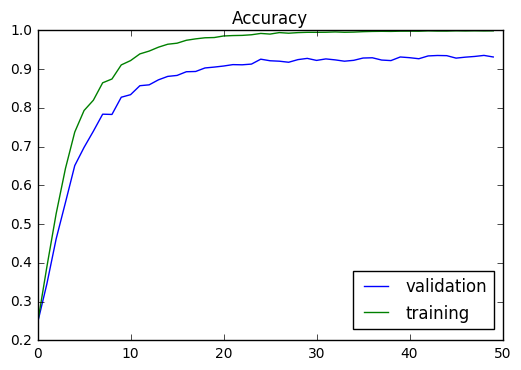

In [10]:
plt.plot(valid_accuracies, label="validation")
plt.plot(train_accuracies, label="training")
plt.legend(bbox_to_anchor=(1, 0.25))
plt.title("Accuracy")
plt.show()


### continue training

If necessary, this cell can be use to continue training if not enough epochs were used

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    num_examples = len(X_train)
    
    print("Training...")
        
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, keep_prob_conv: 0.85})
            
        valid_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        
        valid_accuracies.append(valid_accuracy)
        train_accuracies.append(train_accuracy)
        
        
        print("EPOCH {:2d}:   Validation Accuracy = {:.3f}   Training Accuracy = {:.3f}" .format(i+1,valid_accuracy,train_accuracy))
        
            
    print(valid_accuracies)
    print(train_accuracies)
    
        
    saver.save(sess, './lenet')
    print("Model saved")

### Test set accuracy

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}" .format(test_accuracy))

Test Accuracy = 0.920


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

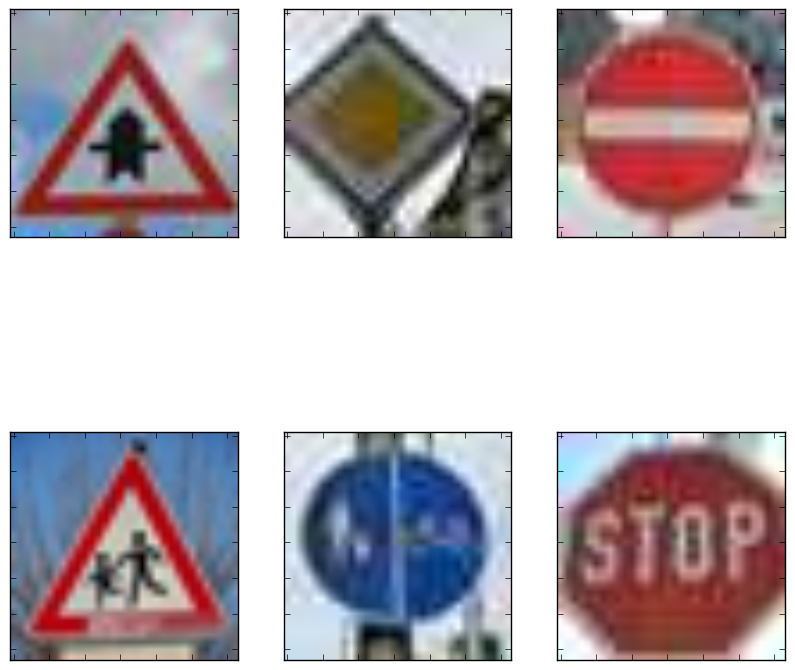

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image                                                 
import glob
 
def load_images ():
    imageFolderPath = 'test/'
    imagePath = glob.glob(imageFolderPath+'/*.JPG')

    test_images = np.array( [np.array(Image.open(imagePath[i])) for i in range(len(imagePath))] )

    #print (np.shape(test_images))
    #print (np.shape(X_train))
    return test_images
def plot_images(images, labels = [], enable_labels= False):
    plt.figure(figsize=(10,10))
    for i in range(6):
        image = images[i]   
        plot = plt.subplot(2,3,i+1)
        if enable_labels : plot.set_title(label_names[labels[i]], fontsize=10)
        plot.imshow(image)
        plot.set_yticklabels([])
        plot.set_xticklabels([])

plot_images(load_images())



### Predict the Sign Type for Each Image

Predicting...


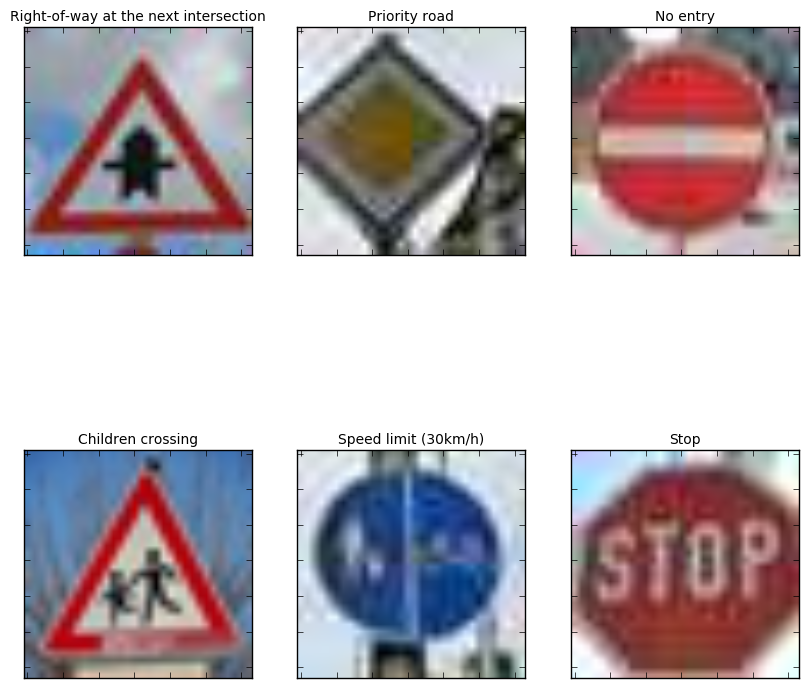

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Predicting...")
    
    test_images = load_images()
    
    #Preprocessing
    for i in range (6):
        test_images[i] = equalize_histogram (test_images[i])
        test_images[i] = (test_images[i] -128)/128
        
    prediction = sess.run(logits, feed_dict={x: test_images, keep_prob: 1, keep_prob_conv: 1})
    #print (np.shape(prediction))
    
    softmax_predictions = sess.run(tf.nn.softmax(prediction))
    #print (np.shape(softmax_predictions))
    
    predictions = sess.run(tf.argmax(softmax_predictions, 1))
    #print (np.shape(predictions))
    

plot_images(load_images(),predictions, True)


    

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

no_correct = 5
no_total =6

print ("Training Accuracy = {:.3f} %" .format(100*no_correct/no_total))

Training Accuracy = 83.333 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

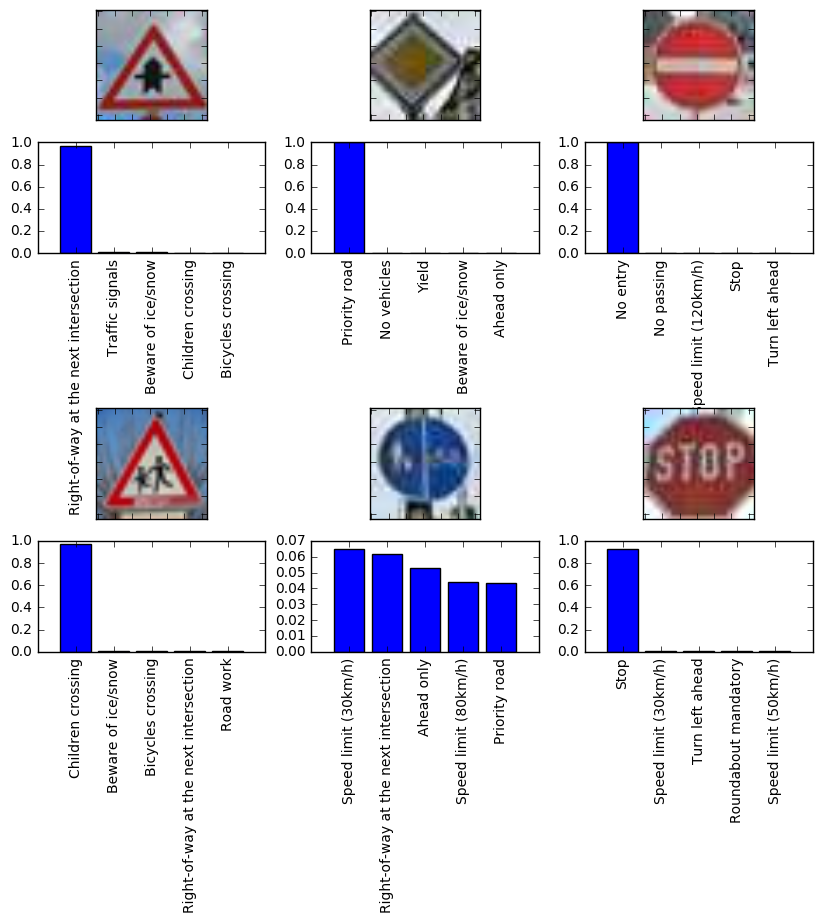

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    softmax_predictions_short = sess.run(tf.nn.top_k(softmax_predictions, k=5))
    #print (np.shape(softmax_predictions_short))

    plt.figure(figsize=(10,10))
    
    test_images=load_images();
    
               
    for i in range(6):
        
        plot = plt.subplot(6,3,int(i/3)*6+i+1)
        
        plot.imshow(test_images[i])
        plot.set_yticklabels([])
        plot.set_xticklabels([])
        
        plot = plt.subplot(6,3,int(i/3)*6+i+4)
        
        
        #List of labels for bar plot        
        labels=[]
        for k in range(5):
            labels.append(label_names[softmax_predictions_short[1][i][k]])
     
       #plot.set_title(label_names[y_train[index]], fontsize=10)
        plt.bar(np.arange(5), softmax_predictions_short[0][i], align='center')
        plt.xticks(np.arange(5), labels, rotation='vertical')
        #rint(labels)
        plot.set_xticklabels(labels, rotation='vertical')
        
        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 